In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [4]:
data = pd.read_csv('history_export.txt', sep="`", header = None)
data.columns = ["Time", "URL", "Title"]
print(data)

                     Time                                                URL  \
0     2017-02-26 16:30:43                             http://www.google.com/   
1     2017-02-26 16:30:43  https://ironport2.iitk.ac.in/B0001D0000N0000N0...   
2     2017-02-26 16:30:43  http://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7a...   
3     2017-02-26 16:30:43  https://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7...   
4     2017-02-26 12:33:16        https://www.messenger.com/t/100006491983665   
5     2017-02-26 12:33:16                         https://www.messenger.com/   
6     2017-02-26 12:33:15                          http://www.messenger.com/   
7     2017-02-26 11:14:34                https://www.messenger.com/t/iamtudu   
8     2017-02-26 11:14:20  http://www.google.co.in/?gfe_rd=cr&ei=iriyWPyO...   
9     2017-02-26 11:14:20  https://www.google.co.in/?gfe_rd=cr&ei=iriyWPy...   
10    2017-02-26 11:14:12   https://support.google.com/chrome/answer/6098869   
11    2017-02-26 11:14:10  https://ironp

In [5]:
data['Time'] = pd.to_datetime(data['Time'])
# data = data[0:200]

In [6]:
data.index = data['Time']
del data['Time']

In [7]:
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'arishika@iitk.ac.in'  # Stick in your IITK email id
    }
)

In [8]:
domainList = data['Title']
for idx in range(len(data)):
    title = data.Title[idx]
    if title=="NaN":
        url = data.URL[idx]
        l = url.split('/')
        l = l[2]
        l = l.strip('www.')
        l = l.strip('.co.in')
        l = l.strip('.com')
        if l=='':
            continue
        else:
            domainList[idx] = l
    else:
        continue
#print (domainList)

In [9]:
print(domainList)
data.to_csv('chrome_history.csv')

Time
2017-02-26 16:30:43                                               Google
2017-02-26 16:30:43                                               Google
2017-02-26 16:30:43                                               Google
2017-02-26 16:30:43                                               Google
2017-02-26 12:33:16                                                  NaN
2017-02-26 12:33:16                                            Messenger
2017-02-26 12:33:15                                            Messenger
2017-02-26 11:14:34                                        (1) Messenger
2017-02-26 11:14:20                                               Google
2017-02-26 11:14:20                                               Google
2017-02-26 11:14:12                  Fix connection errors - Chrome Help
2017-02-26 11:14:10                                       BBC - Homepage
2017-02-26 11:14:10                                       BBC - Homepage
2017-02-26 11:14:10                           

In [10]:
data = pd.read_csv('chrome_history.csv')
data.Time = pd.to_datetime(data.Time)
data.Domain = set(domainList)
docs = data.Domain
print(docs)
#docs = domainList.unique()

{nan, 'Courses', 'Raghunath Tewari', 'create an empty list of n elements python - Google Search', 'Assignments: CS676', 'Grimmett Stirzaker One thousand exercises in probability (Oxford 2001).djvu', 'Dov Monderer - Google Scholar Citations', 'CaretTab - New Tab Page - Chrome Web Store', 'Untitled document - Google Docs', 'IRCTC Train between Stations | Train Ticket booking | Yatra.com', 'lecture-4.pdf', 'bag of visual words opencv python - Google Search', 'Google Code Archive - Long-term storage for Google Code Project Hosting.', 'IIT Kanpur', '(1) ACA, CSE IITK', '07_other_representations', 'Learning-Based Methods in Vision, Spring 2012', 'What are some great examples of coincidence? - Quora', 'match numbers in beautifulsoup - Google Search', 'StatsModels: Statistics in Python — statsmodels documentation', 'Message from Dani - divyanshushende@gmail.com - Gmail', 'CVPR10-LLC.pdf', 'The Laplace Operator', 'Installing NLTK — NLTK 3.0 documentation', 'statsmodels.stats.weightstats.ztest —

In [11]:
data.head()

Time                                                URL  \
0 2017-02-26 16:30:43                             http://www.google.com/   
1 2017-02-26 16:30:43  https://ironport2.iitk.ac.in/B0001D0000N0000N0...   
2 2017-02-26 16:30:43  http://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7a...   
3 2017-02-26 16:30:43  https://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7...   
4 2017-02-26 12:33:16        https://www.messenger.com/t/100006491983665   

    Title  
0  Google  
1  Google  
2  Google  
3  Google  
4     NaN

In [12]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
import gensim
from gensim import corpora, models


In [13]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [14]:
doc_set = list(docs)
print(doc_set)

[nan, 'Courses', 'Raghunath Tewari', 'create an empty list of n elements python - Google Search', 'Assignments: CS676', 'Grimmett Stirzaker One thousand exercises in probability (Oxford 2001).djvu', 'Dov Monderer - Google Scholar Citations', 'CaretTab - New Tab Page - Chrome Web Store', 'Untitled document - Google Docs', 'IRCTC Train between Stations | Train Ticket booking | Yatra.com', 'lecture-4.pdf', 'bag of visual words opencv python - Google Search', 'Google Code Archive - Long-term storage for Google Code Project Hosting.', 'IIT Kanpur', '(1) ACA, CSE IITK', '07_other_representations', 'Learning-Based Methods in Vision, Spring 2012', 'What are some great examples of coincidence? - Quora', 'match numbers in beautifulsoup - Google Search', 'StatsModels: Statistics in Python — statsmodels documentation', 'Message from Dani - divyanshushende@gmail.com - Gmail', 'CVPR10-LLC.pdf', 'The Laplace Operator', 'Installing NLTK — NLTK 3.0 documentation', 'statsmodels.stats.weightstats.ztest —

In [15]:
texts = []
print(len(doc_set))
# loop through document list
for i in doc_set:
    #print(i)
    try:
        i = str(i)
        i.encode()
        # clean and tokenize document string
        raw = i.lower()
        #print (raw)
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
    
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
        # add tokens to list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass
#print (tokens)
#print (texts)

2476


In [16]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# print(dictionary)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
# print(corpus[1])
# print(dictionary[1])
# print(dictionary[4])

In [17]:
# generate LDA model. number of topics is a parameter!
n_topics = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=n_topics, id2word = dictionary, passes=20)

In [18]:
ldamodel.print_topics(n_topics)

[(0,
  '0.053*"python" + 0.049*"googl" + 0.048*"search" + 0.042*"stack" + 0.040*"overflow" + 0.018*"opencv" + 0.012*"list" + 0.012*"numpi" + 0.010*"use" + 0.008*"function"'),
 (1,
  '0.046*"pdf" + 0.019*"train" + 0.016*"time" + 0.014*"indian" + 0.014*"tabl" + 0.013*"railway" + 0.012*"news" + 0.012*"s" + 0.012*"goodread" + 0.011*"1"'),
 (2,
  '0.103*"googl" + 0.097*"search" + 0.023*"ubuntu" + 0.016*"theori" + 0.015*"game" + 0.015*"instal" + 0.010*"chrome" + 0.009*"ssh" + 0.009*"pdf" + 0.009*"python"'),
 (3,
  '0.031*"document" + 0.030*"0" + 0.016*"quora" + 0.016*"opencv" + 0.014*"index" + 0.014*"1" + 0.011*"2" + 0.010*"home" + 0.010*"learn" + 0.010*"3"'),
 (4,
  '0.022*"train" + 0.021*"gmail" + 0.016*"com" + 0.014*"live" + 0.013*"visual" + 0.011*"bitbucket" + 0.011*"project" + 0.010*"recognit" + 0.010*"divyanshushend" + 0.010*"kanpur"')]

In [19]:
ldamodel.get_topic_terms(1,10)

[(44, 0.046005569497152919),
 (42, 0.018741466296034948),
 (234, 0.016488371613651447),
 (416, 0.013716052469315535),
 (462, 0.013513938412084023),
 (414, 0.013464456092357613),
 (249, 0.012420315828157738),
 (130, 0.011907390645560038),
 (545, 0.011717342729485755),
 (60, 0.010873787119015672)]

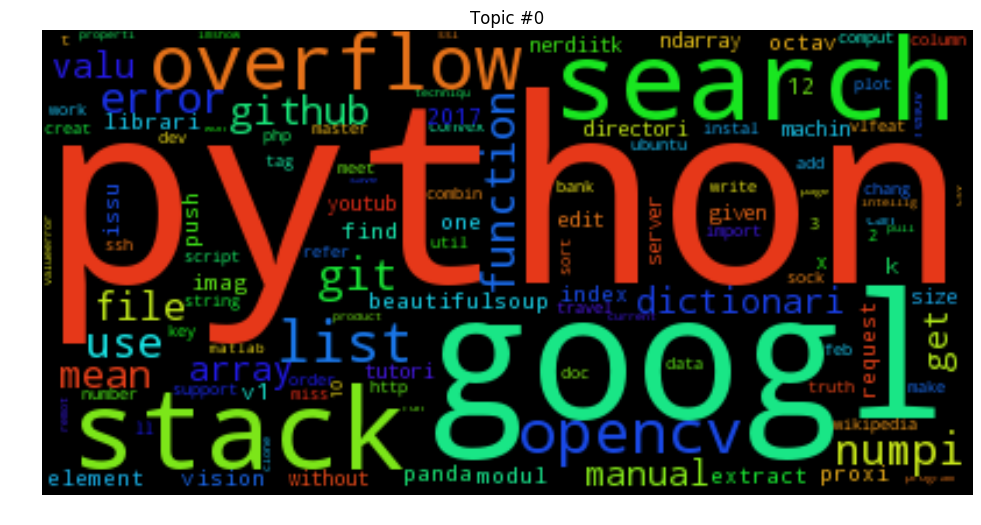

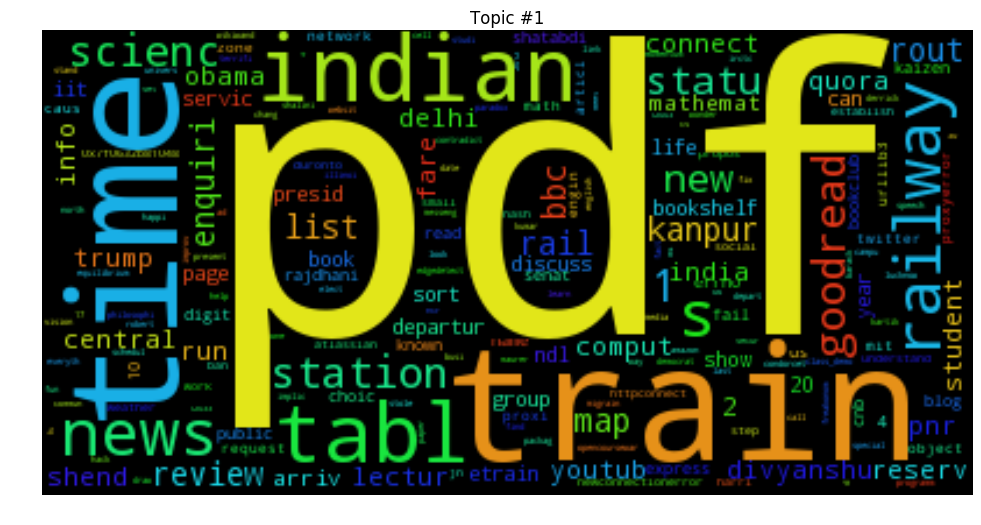

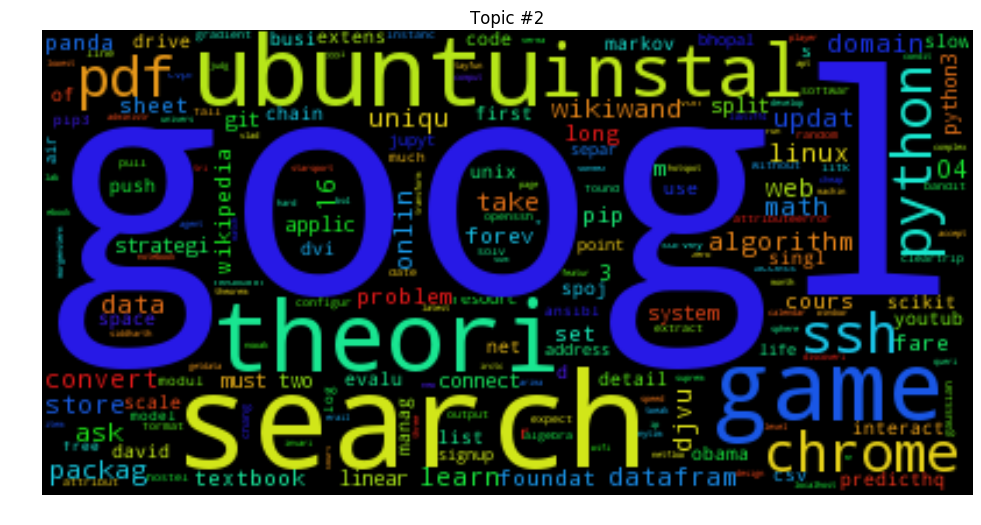

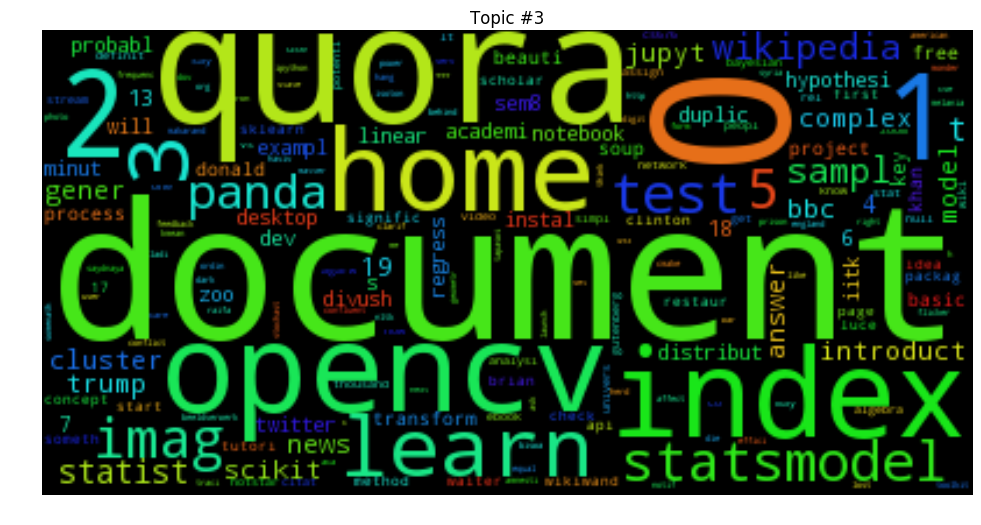

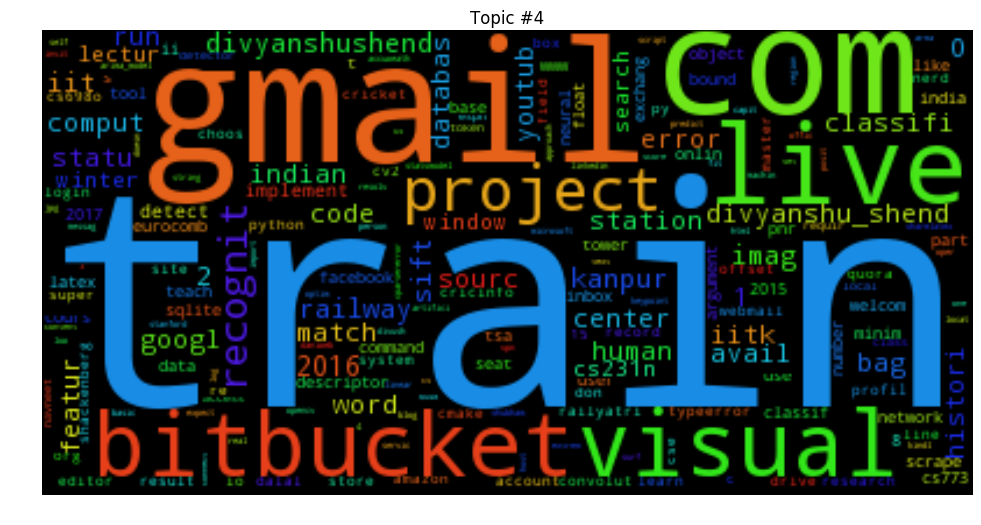

In [20]:
from wordcloud import WordCloud, STOPWORDS
for t in range(ldamodel.num_topics):
    plt.figure(figsize=(12,8))
    plt.imshow(WordCloud().fit_words(ldamodel.show_topic(t, 200)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    #plt.savefig('topic #' + str(t) + '.png', bbox_inches='tight')
    plt.show()

In [21]:
topic = [0]*len(data)
for idx in range(len(doc_set)):
#     print(idx)
    test_idx = doc_set.index(doc_set[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    prs = [item for sublist in probs for item in sublist]
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))
print(topic)
# print(probs)

[2, 4, 4, 0, 3, 3, 3, 2, 0, 4, 1, 0, 2, 4, 3, 1, 1, 4, 0, 3, 4, 0, 0, 3, 3, 4, 0, 4, 1, 0, 0, 4, 2, 4, 2, 2, 4, 0, 4, 1, 0, 4, 0, 4, 1, 4, 4, 1, 2, 1, 0, 2, 3, 0, 4, 0, 2, 0, 4, 1, 1, 3, 4, 0, 2, 3, 4, 2, 4, 3, 1, 1, 4, 3, 4, 3, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 3, 1, 4, 3, 1, 0, 3, 1, 1, 0, 3, 0, 1, 4, 2, 0, 1, 4, 4, 0, 0, 4, 0, 4, 1, 3, 4, 4, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 3, 0, 1, 0, 0, 3, 4, 0, 0, 2, 0, 0, 0, 0, 2, 4, 1, 0, 0, 2, 2, 0, 1, 1, 4, 2, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 4, 4, 3, 1, 2, 2, 0, 4, 0, 1, 0, 3, 2, 2, 2, 3, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 4, 1, 2, 0, 1, 4, 0, 0, 2, 1, 4, 0, 4, 0, 3, 1, 4, 4, 1, 0, 4, 2, 0, 2, 0, 4, 1, 0, 1, 1, 2, 1, 2, 4, 2, 2, 3, 4, 0, 2, 4, 2, 4, 1, 1, 2, 3, 2, 4, 4, 2, 3, 4, 2, 1, 3, 0, 3, 2, 1, 0, 0, 4, 0, 0, 1, 1, 2, 2, 3, 3, 4, 2, 0, 1, 0, 1, 4, 1, 0, 4, 4, 4, 1, 0, 4, 2, 0, 2, 3, 3, 4, 2, 1, 1, 1, 1, 1, 4, 4, 2, 2, 1, 1, 2, 3, 0, 1, 3, 2, 0, 0, 4, 2, 2, 0, 4, 4, 3, 3, 0, 3, 0, 0, 2, 4, 3, 3, 4, 1, 0, 2, 4, 1, 3, 0, 4, 2, 1, 4, 

In [22]:
data['Topic'] = topic

In [23]:
data.head()

Time                                                URL  \
0 2017-02-26 16:30:43                             http://www.google.com/   
1 2017-02-26 16:30:43  https://ironport2.iitk.ac.in/B0001D0000N0000N0...   
2 2017-02-26 16:30:43  http://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7a...   
3 2017-02-26 16:30:43  https://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7...   
4 2017-02-26 12:33:16        https://www.messenger.com/t/100006491983665   

    Title  Topic  
0  Google      2  
1  Google      4  
2  Google      4  
3  Google      0  
4     NaN      3

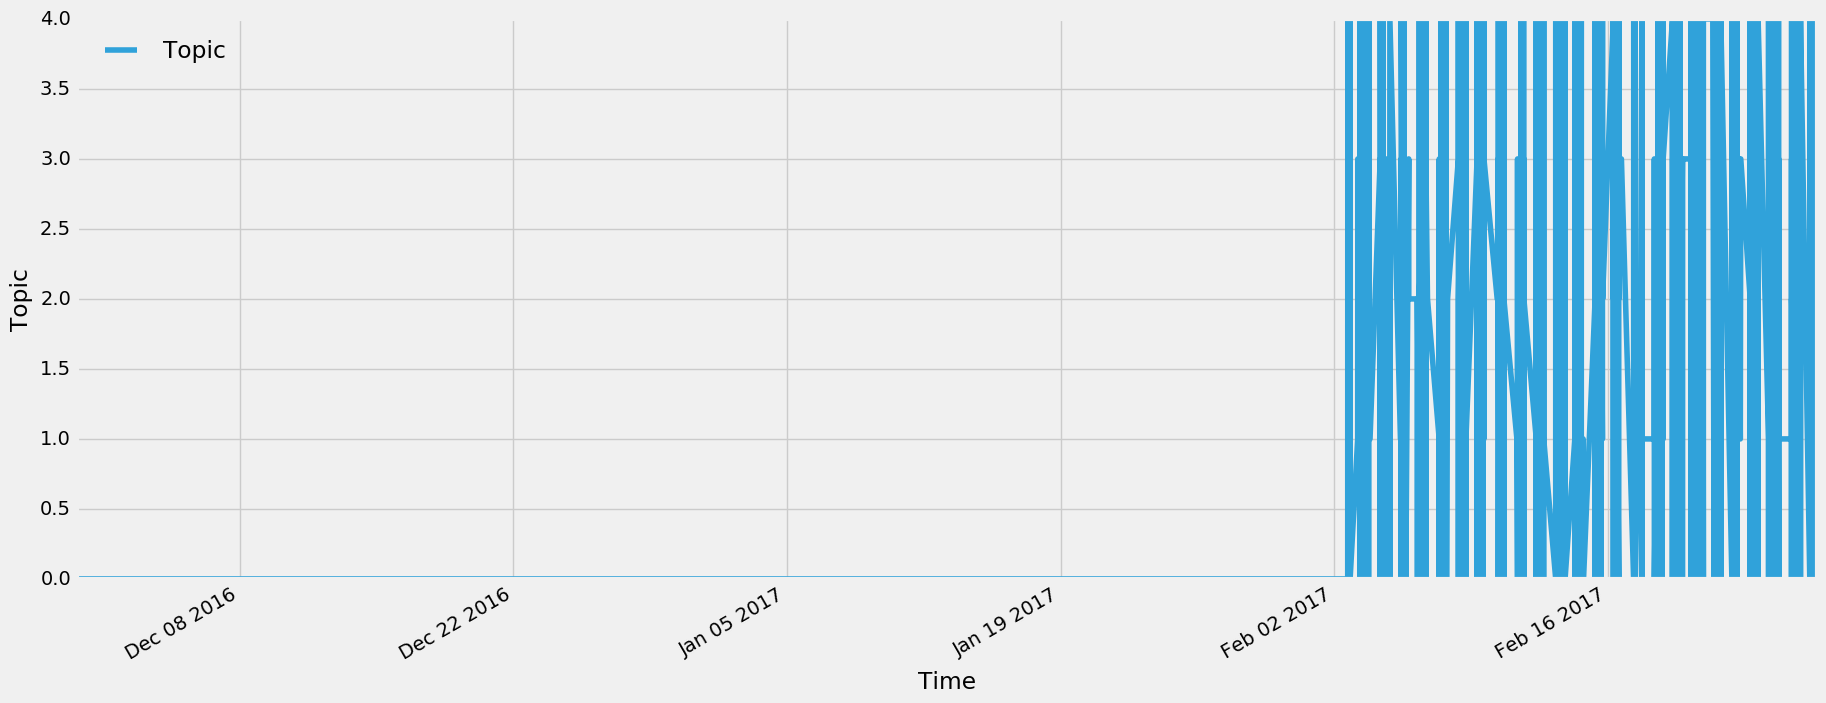

In [24]:
sorted_data = data.sort_values('Time')
plt.style.use('fivethirtyeight')
sorted_data.plot(x='Time', y='Topic', figsize=(20,8))
plt.ylabel('Topic')
plt.show()

In [25]:
cp_data = data

In [26]:
cp_data.head()

Time                                                URL  \
0 2017-02-26 16:30:43                             http://www.google.com/   
1 2017-02-26 16:30:43  https://ironport2.iitk.ac.in/B0001D0000N0000N0...   
2 2017-02-26 16:30:43  http://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7a...   
3 2017-02-26 16:30:43  https://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7...   
4 2017-02-26 12:33:16        https://www.messenger.com/t/100006491983665   

    Title  Topic  
0  Google      2  
1  Google      4  
2  Google      4  
3  Google      0  
4     NaN      3

In [27]:
cp_data['Time'] = pd.to_datetime(cp_data['Time'])
cp_data.index = cp_data['Time']
del cp_data['Time']
cp_data.head()

URL  \
Time                                                                     
2017-02-26 16:30:43                             http://www.google.com/   
2017-02-26 16:30:43  https://ironport2.iitk.ac.in/B0001D0000N0000N0...   
2017-02-26 16:30:43  http://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7a...   
2017-02-26 16:30:43  https://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7...   
2017-02-26 12:33:16        https://www.messenger.com/t/100006491983665   

                      Title  Topic  
Time                                
2017-02-26 16:30:43  Google      2  
2017-02-26 16:30:43  Google      4  
2017-02-26 16:30:43  Google      4  
2017-02-26 16:30:43  Google      0  
2017-02-26 12:33:16     NaN      3

In [28]:
occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
# print(cp_data[cp_data.index])
for day in weekdays:
    tlist = cp_data[cp_data.index.weekday_name == day].Topic.tolist()
    res = np.histogram(tlist,bins=list(range(n_topics)))
    occurrences.append(list(res[0]))
    
print (occurrences)
print (len(occurrences))

[[552, 78, 92, 182], [411, 63, 62, 110], [629, 41, 59, 92], [686, 71, 74, 148], [681, 71, 89, 114], [838, 65, 67, 112], [919, 59, 70, 129]]
7


In [29]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)
t3 = [0]*len(occurrences) 

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]
    t3[d] = occurrences[d][3]

cumt1 = [sum(x) for x in zip(t0, t1)]
cumt2 = [sum(x) for x in zip(t0, t1, t2)]
#print (cumt1)

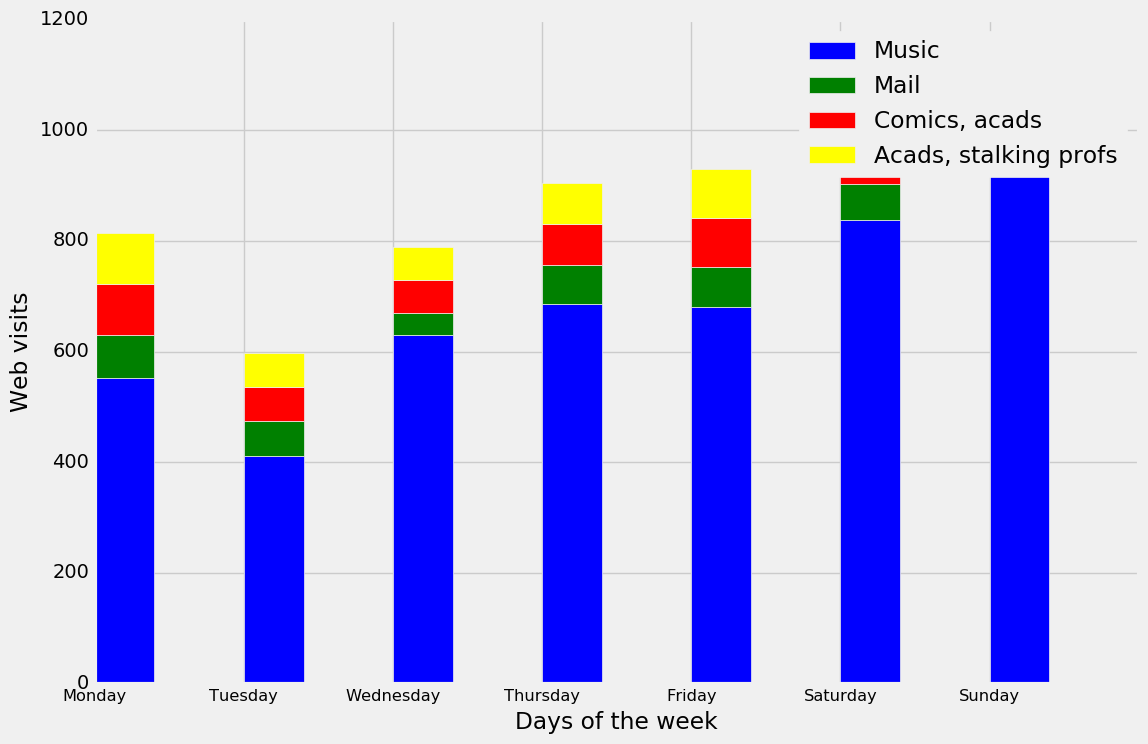

In [30]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(7), t0, 0.4, label='Music')
p1 = plt.bar(range(7), t1, 0.4,bottom=t0, color='green', label='Mail')
p2 = plt.bar(range(7), t2, 0.4, bottom=cumt1, color='red', label='Comics, acads')
p3 = plt.bar(range(7), t2, 0.4, bottom=cumt2, color='yellow', label='Acads, stalking profs')
plt.xticks(range(7), weekdays, size='small')
plt.xlabel('Days of the week')
plt.ylabel('Web visits')
plt.legend()
plt.show()

In [31]:
# occurrences = []
# weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
# # print(cp_data[cp_data.index])
# for day in weekdays:
#     tlist = cp_data[cp_data.index.weekday_name == day].Topic.tolist()
#     res = np.histogram(tlist,bins=[0,1,2,3,4])
#     occurrences.append(list(res[0]))
    
# print (occurrences)
# print (len(occurrences))

In [32]:
cp_data['tp'] = ['']*len(cp_data)
# print(cp_data)
# print(len(cp_data.index))
for i in range(len(cp_data)):
    a = cp_data.index[i]
#     print(a)
    b = (str(a).split(' '))
#     print(b)
    c = b[1].split(':')
#     print(c[0])
#     0 for midnight, 1 for morning, 2 for afternoon-evening and 3 for late evening
    if (int(c[0])>=0 and int(c[0])<=6):
        cp_data.tp[i] = 'midnight'
    elif (int(c[0])>6 and int(c[0])<=12):
        cp_data.tp[i] = 'morning'
    elif (int(c[0])>12 and int(c[0])<=18):
        cp_data.tp[i] = 'afternoon'
    else:
        cp_data.tp[i] = 'evening'

print("Done!")
# occurrences = []
# weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
# periods = ['morning', 'afternoon', 'evening', 'midnight']
# for p in periods:
#     tlist = cp_data[cp_data.tp == p].Topic.tolist()
#     res = np.histogram(tlist,bins=[0,1,2,3,4])
#     occurrences.append(list(res[0]))
    
# print (occurrences)
# print (len(occurrences))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

Done!


In [33]:
print(cp_data.tp)
print(len(cp_data.tp))

Time
2017-02-26 16:30:43    afternoon
2017-02-26 16:30:43    afternoon
2017-02-26 16:30:43    afternoon
2017-02-26 16:30:43    afternoon
2017-02-26 12:33:16      morning
2017-02-26 12:33:16      morning
2017-02-26 12:33:15      morning
2017-02-26 11:14:34      morning
2017-02-26 11:14:20      morning
2017-02-26 11:14:20      morning
2017-02-26 11:14:12      morning
2017-02-26 11:14:10      morning
2017-02-26 11:14:10      morning
2017-02-26 11:14:10      morning
2017-02-26 08:08:53      morning
2017-02-26 08:08:52      morning
2017-02-26 08:08:46      morning
2017-02-26 08:08:46      morning
2017-02-26 08:08:37      morning
2017-02-26 08:08:37      morning
2017-02-26 08:08:37      morning
2017-02-26 08:08:37      morning
2017-02-26 08:08:33      morning
2017-02-26 08:08:33      morning
2017-02-26 08:08:03      morning
2017-02-26 08:08:02      morning
2017-02-26 08:08:02      morning
2017-02-26 08:08:02      morning
2017-02-26 08:08:02      morning
2017-02-26 08:08:02      morning
     

In [34]:
occurrences = []
periods = ['midnight', 'morning', 'afternoon', 'evening']
del tlist
del res
for p in periods:
    tlist = cp_data[cp_data.tp == p].Topic.tolist()
    res = np.histogram(tlist,bins=list(range(n_topics)))
    occurrences.append(list(res[0]))

print(occurrences)
print(len(occurrences))

[[392, 21, 38, 49], [1535, 182, 189, 357], [2525, 225, 250, 435], [264, 20, 36, 46]]
4


In [35]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)
t3 = [0]*len(occurrences) 

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]
    t3[d] = occurrences[d][3]

cumt1 = [sum(x) for x in zip(t0, t1)]
cumt2 = [sum(x) for x in zip(t0, t1, t2)]
#print (cumt1)

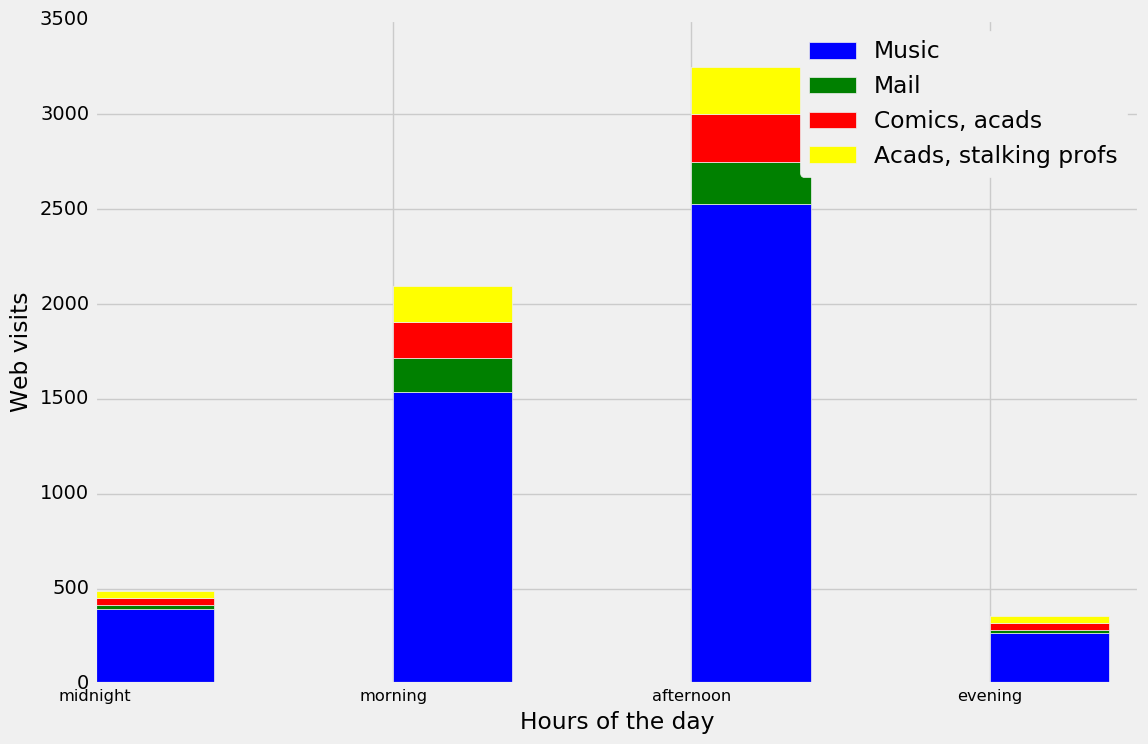

In [36]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(4), t0, 0.4, label='Music')
p1 = plt.bar(range(4), t1, 0.4,bottom=t0, color='green', label='Mail')
p2 = plt.bar(range(4), t2, 0.4, bottom=cumt1, color='red', label='Comics, acads')
p3 = plt.bar(range(4), t2, 0.4, bottom=cumt2, color='yellow', label='Acads, stalking profs')
plt.xticks(range(4), periods, size='small')
plt.xlabel('Hours of the day')
plt.ylabel('Web visits')
plt.legend()
plt.show()

In [39]:
# Now the switch thing!
# sw stands for switch
sw_data = data
sw_data.head()

URL  \
Time                                                                     
2017-02-26 16:30:43                             http://www.google.com/   
2017-02-26 16:30:43  https://ironport2.iitk.ac.in/B0001D0000N0000N0...   
2017-02-26 16:30:43  http://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7a...   
2017-02-26 16:30:43  https://www.google.co.in/?gfe_rd=cr&ei=sQKzWK7...   
2017-02-26 12:33:16        https://www.messenger.com/t/100006491983665   

                      Title  Topic         tp  
Time                                           
2017-02-26 16:30:43  Google      2  afternoon  
2017-02-26 16:30:43  Google      4  afternoon  
2017-02-26 16:30:43  Google      4  afternoon  
2017-02-26 16:30:43  Google      0  afternoon  
2017-02-26 12:33:16     NaN      3    morning

In [65]:
# sw_data['Time'] = pd.to_datetime(sw_data['Time'])
# sw_data.index = sw_data['Time']
n_topics = 5
sw_data['time'] = sw_data.index
switch_mat = [[]]*n_topics
# This next line gives the dwell time on each index!
# print(sw_data.index)
sw_data['delta'] = (sw_data['time'].shift()-sw_data['time']).fillna(0)
# print(sw_data['delta'])
sw_data['dwell'] = [0]*len(sw_data)
count = 0
for idx in range(len(sw_data) - 1):
    dwell_time = sw_data.delta[idx]
    p = str(dwell_time)
    # p looks like "0 days 03:57:41"
    l = p.split(' ')
    # print(l[0])
    # l = ['0', 'days', '03:57:41']
    if int(l[0]) > 0:
        print(str(sw_data.index[idx]) + "\tto\t" + str(sw_data.index[idx-1]) + "\t" + str(dwell_time))
        count = count + 1
print("The count is " + str(count))

2017-01-02 11:48:05	to	2017-01-04 05:43:04	1 days 17:54:59
2016-12-24 09:49:35	to	2016-12-25 11:45:49	1 days 01:56:14
2016-12-17 16:16:26	to	2016-12-22 06:26:49	4 days 14:10:23
The count is 3


In [ ]:
# Since history is stored in reverse order!
for idx in range(1,len(sw_data)):
    this_topic = sw_data.Topic[idx]
    next_topic = sw_data.Topic[idx+1]
    dwell_time = sw_data.delta[idx]
    p = str(dwell_time)
    # p looks like "0 days 03:57:41"
    l = p.split(' ')
    # l = ['0', 'days', '03:57:41']
    tm = l[3].split(":")
    # tm = ['03', '57', '41']
    time_sec = int(tm[0])*3600 + int(tm[1])*60 + int(tm[2])
    if int(l[0]) > 0 or int(tm[0])>3:
        # If number of days is more than 0 or more than 3 hours!
        sw_data.dwell[idx] = 0
    else:
        sw_data.dwell[idx] = time_sec
